<a href="https://colab.research.google.com/github/bezerraluis/Churn--Project/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set

Find a copy on :[Kaggle](https://www.kaggle.com/shrutimechlearn/churn-modelling)

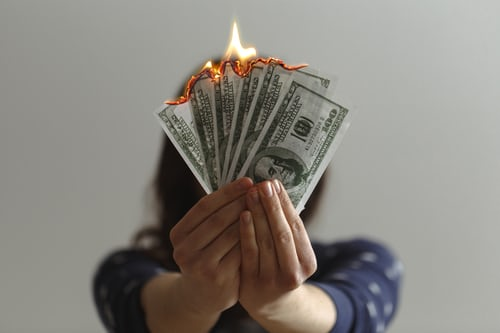

# Hypotheses 


h1 .Customers with lower scores tend to leave the bank.

h2 .The country is decisive for the client to leave the bank

h3 .There are more men than women who leave the bank.

h4 .Younger customer has a tendency to leave the bank

h5 .Customers with up to 2 years as a customer usually leave the bank.

h6 .Customers who do not have a credit card tend to leave the bank.





# Business Problem

Decreasing the number of churns is something that the entire company needs to pursue. It is essential for the growth and health of any operation.

How to project growth, attract investors if customer retention fails within organizations.

When a user churns, and this is repeated with other people, a very large alert signal needs to be turned on.

And a question must be answered: what are we doing wrong?

Customers talk to each other. Information is accessible to all. Therefore, working to have an ever lower churn, close to zero, is a tireless pursuit.

More than that. Understanding the (especially financial) impact of this metric is vital. It is what will maintain financial health and a safer hike for any business.

## Business Needs



TheBank needs to understand why the churn rate is increasing and which actions 

are recommended to reduce this number. They ask you to create a predictive 

model that helps to explain the probability of a client to churn.

The information they need from you is:

Current churn rate Model's performance Turnover if your prediction helps to 

prevent churn If The Bank opts for offering discounts to avoid churn, what 

would be the total cost for the entitySuggestions to reduce churn

# Solution

Model to predict client's churn probability, using API to receive a customer and output a probability

# Description

RowNumber - Row Numbers from 1 to 10000

CustomerId - Unique Ids for bank customer identification  

Surname - Customer's last name

CreditScore -  Credit score of the customer

Geography - The country from which the customer belongs

Gender -  Male or Female

Age - Age of the customer

Tenure - Number of years for which the customer has been with the bank

Balance - Bank balance of the customer

NumOfProducts - Number of bank products the customer is utilising

# Index:

1 Problema de Negócio.

2 Importações de bibliotecas

3.0 Análise descritiva dos Dados
 
 3.1 Descrição dos dados
 
 3.2 Verificando valores nulos
 
 3.3 Verificando a distribuição e outliers

4.0 Análise Exploratória

5.0 Limpeza de dados

6.0 Preparando os dados 

7.0Algoritmo Não Supervisionado

8.0 Algoritmo Supervisionado

9.0 Criando novas variáveis

10.0 SMOTE

11.0 Métricas

12.0 Modelo base

# 1.0 Frameworks

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , KFold , cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# para tirar os valores de notação científica
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')




# Desabilitando warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Helper Function

In [206]:
def Myheat_map(dataset, variaveis):

    df_corr = dataset[variaveis].corr()

    fig, ax = plt.subplots(figsize=(16, 10))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # color map
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
                   linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
                   cbar_kws={"shrink": .8}, square=True)
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks, rotation=20)

    # title
    title = 'CORRELATION MATRIX\n'
    plt.title(title, loc='left', fontsize=18)
    plt.show()
    
def cramer_v(var_x, var_y):

    # builds contigency matrix (or confusion matrix)
    confusion_matrix_v = pd.crosstab(var_x, var_y).values

    # gets the sum of all values in the matrix
    n = confusion_matrix_v.sum()

    # gets the rows, cols
    r, k = confusion_matrix_v.shape

    # gets the chi-squared
    chi2 = chi2_contingency(confusion_matrix_v)[0]

    # makes the bias correction
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    kcorr = k - (k-1) ** 2 / (n-1)
    rcorr = r - (r-1) ** 2 / (n-1)

    # returns cramér V
    return np.sqrt((chi2corr/n) / min(kcorr-1, rcorr-1))

def model_selection(X_train, y_train, X_test, y_test):

    # Modelos
    models = [('lr',LogisticRegression(),1),
              ('svm',SVC(),2),
              ('lda',LinearDiscriminantAnalysis(),3),
              ('qda',QuadraticDiscriminantAnalysis(),4),
              ('dt',DecisionTreeClassifier(),5),
              ('rf', RandomForestClassifier(class_weight="balanced"),6),
              ('lgb',lgb.LGBMClassifier(),7),
              ('xgboost', XGBClassifier(),8),
              ('bagging',BaggingClassifier(),9),
              ('knn',KNeighborsClassifier(),10)]

    # Resultados
    resultados = {'LR': [],
                  'SVM': [],
                  'LDA': [],
                  'QDA': [],
                  'DecisionTree': [],
                  'RandomForestClassifier': [],
                  'LGBM': [],
                  'XGBOOST': [],
                  'BAGGING':[],
                  'KNN':[]}

    # Testando algoritmos
    for name, model,_ in models:
        
        counter = 0
        resultado = []
        while counter <= 10:
        
            # resultado
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            score = f1_score(y_test, pred)
            resultado.append(score)
            counter += 1


        if name == 'lr':
            resultados['LR'].append(np.mean(resultado))
        elif name == 'knn':
            resultados['KNN'].append(np.mean(resultado)) 
        elif name == 'svm':
            resultados['SVM'].append(np.mean(resultado))
        elif name == 'dt':
            resultados['DecisionTree'].append(np.mean(resultado))
        elif name == 'rf':
            resultados['RandomForestClassifier'].append(np.mean(resultado))
        elif name == 'lgb':
            resultados['LGBM'].append(np.mean(resultado))
        elif name == 'xgboost':
            resultados['XGBOOST'].append(np.mean(resultado))
        elif name =='lda':
            resultados['LDA'].append(np.mean(resultado))
        elif name == 'qda':
            resultados['QDA'].append(np.mean(resultado))
        elif name == 'bagging':
            resultados['BAGGING'].append(np.mean(resultado))
   

    # Painel
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# 2.0 Descriptive Data Analysis

## 2.1 Viewing data

In [57]:
df_churn= pd.read_csv('/content/drive/My Drive/Todos os arquivos do pc antigo/datasets Kaggle/churn.csv')

In [58]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0


## 2.2 Missing Values


We do not have missing values

In [59]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2.3 checking the classes

 80 % of the customers did not close account 

In [60]:
stay = (exited[0] / len(df_churn2))*100

print(stay,'%')



NameError: ignored

*We* have  inbalanced classes on our data set 

In [61]:
leave = (exited[1] / len(df_churn2))*100

leave

NameError: ignored

## 2.4 Distribution and Data

### 2.4.1 Row Number

In [62]:
df_churn['RowNumber'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

As we can see RowNumber is just a line identifier so it has no predictive power and we will delete it

In [63]:
df_churn2 = df_churn.drop('RowNumber',axis= 1)

In [64]:
df_churn2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1
1,15647311,Hill,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0
2,15619304,Onio,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0
4,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0


### 2.4.2 CustomerId

In [65]:
df_churn['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

The same goes to CustomerID

In [66]:
df_churn2 = df_churn.drop('CustomerId',axis= 1)

### 2.4.3 Surname   

In [67]:
df_churn['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

There is no relation between churn and Surname, we are going to drop it.


In [68]:
df_churn2 = df_churn.drop('Surname',axis= 1)

In [69]:
df_churn2.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1
1,2,15647311,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0
2,3,15619304,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1
3,4,15701354,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0
4,5,15737888,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0


### 2.4.4 CreditScore  

We have a good distribution of the data. A standard deviation of 96 and 75 percent of the data is between 584 and 718

In [70]:
df_churn2['CreditScore'].describe()

count   10,000.000
mean       650.529
std         96.653
min        350.000
25%        584.000
50%        652.000
75%        718.000
max        850.000
Name: CreditScore, dtype: float64

Here we can better visualize our distribution and our quartiles

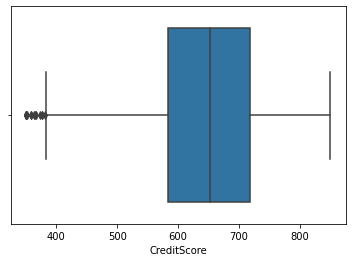

In [71]:
sns.boxplot(df_churn2['CreditScore'])

We have a distribution very close to a normal curve.

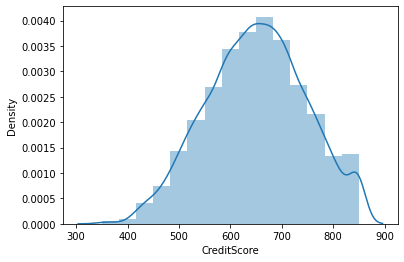

In [72]:
sns.distplot(df_churn2['CreditScore'], bins= 15)

### 2.4.5 Geography   

We do not have misspelled words

In [73]:
df_churn2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### 2.4.6 Gender 

We do not have misspelled words

In [74]:
df_churn2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### 2.4.7 Age 

In [75]:
df_churn2['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

We have a good distribution of the data. A standard deviation of 10 and 75 percent of the data is between 32 and 44 



In [76]:
df_churn2['Age'].describe()

count   10,000.000
mean        38.922
std         10.488
min         18.000
25%         32.000
50%         37.000
75%         44.000
max         92.000
Name: Age, dtype: float64

We can see that we have data from 60 years old, which can be outliers in our distribution.

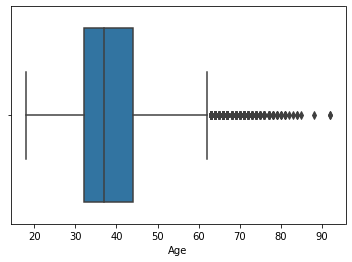

In [77]:
sns.boxplot(df_churn2['Age'])

We can see that our distribution is approaching a normal distribution and that data from 60 is pulling the tail to the right

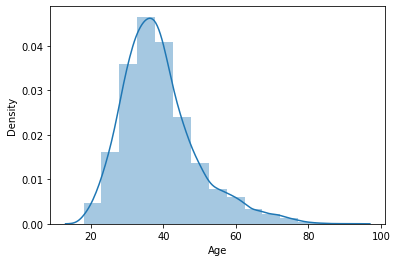

In [78]:
sns.distplot(df_churn2['Age'], bins= 15)

### 2.4.8 Tenure 

In [79]:
df_churn2['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

We do not have a problem with our data the standard deviation is low ,our data is distributed between 0 to 10 and the quartiles are ok.

In [80]:
df_churn2['Tenure'].describe()

count   10,000.000
mean         5.013
std          2.892
min          0.000
25%          3.000
50%          5.000
75%          7.000
max         10.000
Name: Tenure, dtype: float64

We do not have outliers

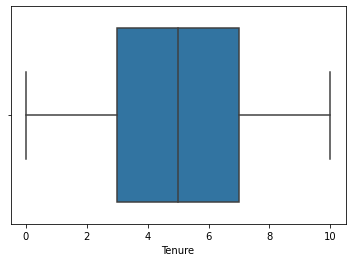

In [81]:
sns.boxplot(df_churn2['Tenure']);

We do not have a normal distribution.


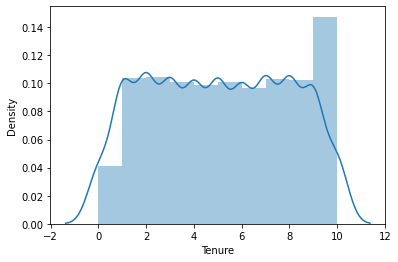

In [82]:
sns.distplot(df_churn2['Tenure'],bins=10);

### 2.4.9 Balance

In [83]:
df_churn2['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

We have customers with 0 on the account and 250898 max and most of the customers have between 0 to 127644


In [84]:
df_churn2['Balance'].describe()

count    10,000.000
mean     76,485.889
std      62,397.405
min           0.000
25%           0.000
50%      97,198.540
75%     127,644.240
max     250,898.090
Name: Balance, dtype: float64

We do not have outliers

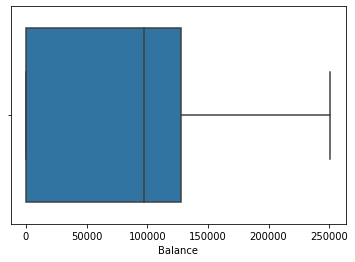

In [85]:
sns.boxplot(df_churn2['Balance']);

We do not have a normal distribution , coustomers with 0 balance are skewing our data.

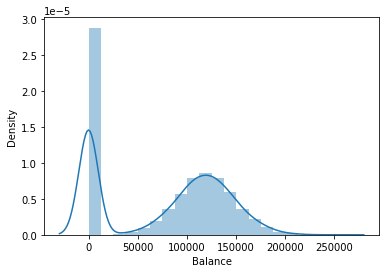

In [86]:
sns.distplot(df_churn2['Balance'],bins=20);

In [87]:
df_churn2['NumOfProducts'].unique()

array([1, 3, 2, 4])

We have a good value of standard deviation of 0.58 showing our data is not too dispersed from the mean.

In [88]:
df_churn2['NumOfProducts'].describe()

count   10,000.000
mean         1.530
std          0.582
min          1.000
25%          1.000
50%          1.000
75%          2.000
max          4.000
Name: NumOfProducts, dtype: float64

We have a value of 4 that might be a outlier

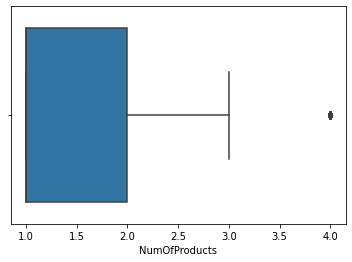

In [89]:
sns.boxplot(df_churn2['NumOfProducts']);

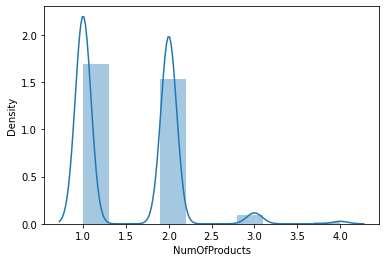

In [90]:
sns.distplot(df_churn2['NumOfProducts'], bins= 10);

### 2.4.9.1 HasCrCard  

We only have 0 and 1 

In [91]:
df_churn2['HasCrCard'].unique()

array([1, 0])

### 2.4.9.2 EstimatedSalary 

Most of our data is 51000 and 149388 and our data is a bit dispersed std of 57510

In [92]:
df_churn2['EstimatedSalary'].describe()

count    10,000.000
mean    100,090.240
std      57,510.493
min          11.580
25%      51,002.110
50%     100,193.915
75%     149,388.247
max     199,992.480
Name: EstimatedSalary, dtype: float64

We do not have any outliers

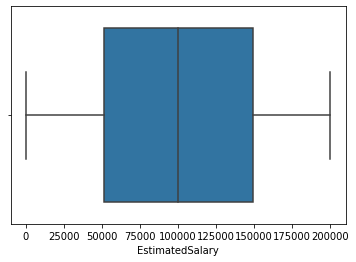

In [93]:
sns.boxplot(df_churn2['EstimatedSalary'])

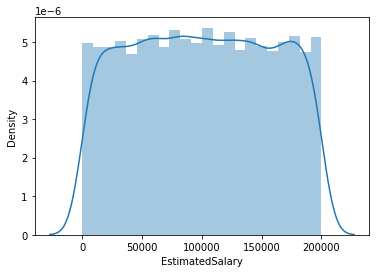

In [94]:
sns.distplot(df_churn2['EstimatedSalary'])

###2.4.9.3 Exited  

In [95]:
df_churn2['Exited'].unique()

array([1, 0])

# 3.0 Exploratory Data Analysis

## 3.1 Checking the Hypotheses

h1. Customers with lower scores tend to leave the bank.

h2. The country is decisive for the client to leave the bank

h3. There are more men than women who leave the bank.

h4. Younger customer has a tendency to leave the bank

h5. Customers with up to 2 years as a customer usually leave the bank.

h6. Customers who do not have a credit card tend to leave the bank.

### 3.1.1 h1 Customers with lower scores tend to leave the bank.

Let's create a new dataframe with CredtScore less than 500 because this is our parameter to low score.

In [96]:
less_than = df_churn2.query('CreditScore <=500')

len(less_than)

643

Now we can see that 152 customers left the bank

In [97]:
count = less_than['Exited'].value_counts()

count

0    491
1    152
Name: Exited, dtype: int64

  24 %  of the customers with low Score left the bank

In [98]:
porc_leave = (count[1] / len(less_than))*100

print(round(porc_leave),'%')

24 %


we can visualize the difference of customers who left and who did not leave

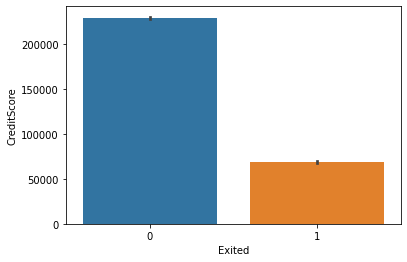

In [99]:
sns.barplot(y= 'CreditScore', x= 'Exited', data= less_than,estimator=np.sum)

We are going to create a new dataframe with customers with more than 500 score

In [100]:
more_than = df_churn2.query('CreditScore >500')

len(more_than)

9357

We have 1885 customers with more than 500 score who left the bank 

In [101]:
counts =more_than['Exited'].value_counts()

counts

0    7472
1    1885
Name: Exited, dtype: int64

20 % of the customers left the bank

In [102]:
porc_leave_more = (counts[1] / len(more_than))*100

print(round(porc_leave_more) ,'%')

20 %


we can visualize the difference of customers who left and who did not leave

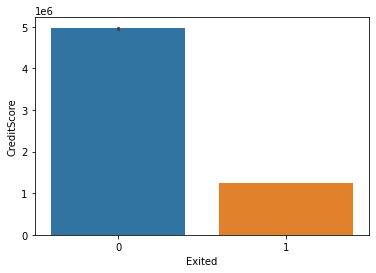

In [103]:
sns.barplot(y= 'CreditScore', x= 'Exited', data= more_than,estimator=np.sum)

###3.1.2 h2 The country is decisive for the client to leave the bank

France and Germany has almost the same amount of customers who left the bank , only Spain has half of the value.

In [104]:
country_leave = df_churn2.groupby('Geography')['Exited'].sum()

country_leave

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Total customers from france who left the bank

In [105]:
total_france = df_churn2.query('Geography == "France"')

len(total_france)

5014

16 % of customers from France left the bank

In [106]:
porcent_france_leave = round(((country_leave[0]) / len(total_france))*100)

porcent_france_leave

16

Total customers from Germany who left the bank

In [107]:
total_germany = df_churn2.query('Geography == "Germany"')

len(total_germany)

2509

32 % of customers from Germany left the bank

In [108]:
porcent_germany_leave = round (((country_leave[1]) / len(total_germany))*100)

porcent_germany_leave

32

Total customers from Spain who left the bank

In [109]:
total_spain = df_churn2.query('Geography == "Spain"')

len(total_spain)

2477

17 % of customers from Spain left the bank

In [110]:
porcent_spain_leave = round(((country_leave[2]) / len(total_spain))*100)

porcent_spain_leave

17

Here we can visualize the difference between the three cities 

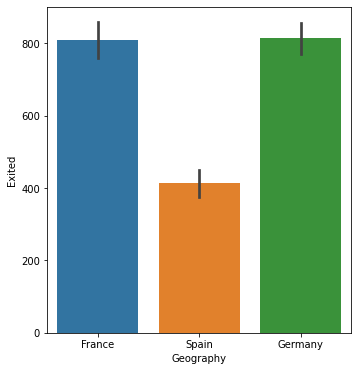

In [111]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x= 'Geography',y= 'Exited',data= df_churn2,estimator= np.sum);

### 3.1.3  h3 There are more men than women who leave the bank

We have 1139 women and 898 men who left the bank

In [112]:
gender_leave = df_churn2.groupby('Gender')['Exited'].sum()

gender_leave

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

Total of men

In [113]:
male = df_churn2.query('Gender == "Male"')

male.shape

(5457, 13)

We have 16 % of men who left the bank

In [114]:
porce_male_leave = round((gender_leave[1] / len(male))*100)

porce_male_leave

16

Total of women who left the bank

In [115]:
female = df_churn2.query('Gender == "Female"')

female.shape

(4543, 13)

We have 20 % of women who left the bank 

In [116]:
porce_female_leave = round((gender_leave[1] / len(female))*100)

porce_female_leave

20

Here we can visualize the difference between the two classes 

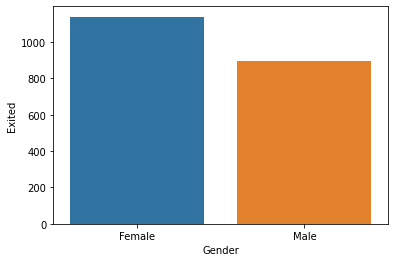

In [117]:
sns.barplot(x= 'Gender', y= 'Exited', data= df_churn2,ci= None ,estimator= np.sum)

### 3.1.4 h4 Younger customer has a tendency to leave the bank

####  Until 20 years old

In order to complete this analysis I am going to split our data set into different classes every 20 years , in the first class we have 89 customers

In [118]:
Age_btw_20 = df_churn2.query('Age <= 20')

len(Age_btw_20)

89

We have 5 customers who left the bank and 84 who did not

In [119]:
count_20 = Age_btw_20['Exited'].value_counts()

count_20

0    84
1     5
Name: Exited, dtype: int64

We can see that only 5  20-year-old customers left the bank and the quantity for age

In [120]:
btw_20 = Age_btw_20.groupby('Age')['Exited'].sum().head(10)

btw_20

Age
18    2
19    1
20    2
Name: Exited, dtype: int64

6 % of our customers with a maximum of 20 years old age left the bank

In [121]:
porc_leave_btw20 = (count_20[1] / len(Age_btw_20))*100

print(round(porc_leave_btw20),'%')

6 %


Here we can plot the customers by age

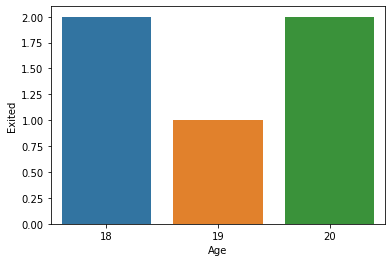

In [122]:
sns.barplot(x= 'Age', y= 'Exited', data= Age_btw_20,ci= None ,estimator= np.sum)

#### Between 20 and 40 years old

Customers between 20 and 40 years old. We have 6330 customers with that age

In [123]:
Age_btw_20_40 = df_churn2.query('Age >20 & Age <=40')

len(Age_btw_20_40)

6330

We have 681 customers who left the bank and 5649 who did not

In [124]:
count_20_40 = Age_btw_20_40['Exited'].value_counts()

count_20_40

0    5649
1     681
Name: Exited, dtype: int64

11 % of our customers between 20 and 40 years old left the bank

In [125]:
porc_leave_20_40 = (count_20_40[1] / len(Age_btw_20_40))*100

print(round(porc_leave_20_40),'%')

11 %


We can see that the top 10 customers who leave the bank between 20 and 40 years old are between 30 and 40 years old

In [126]:
Age_btw_20_40.groupby('Age')['Exited'].sum().sort_values(ascending = False).head(10)

Age
40    89
39    72
38    63
37    62
35    57
36    53
33    44
34    33
31    33
32    32
Name: Exited, dtype: int64

Now we can visualize all the ages and it is clear that 
The higher the age the more customers leave the bank when we consider ages from 20 to 40 years old.

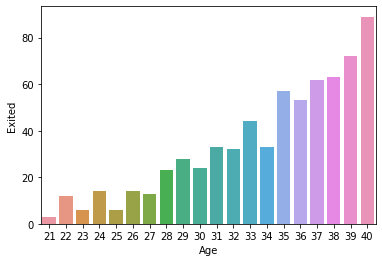

In [127]:
sns.barplot(x= 'Age', y= 'Exited', data= Age_btw_20_40,ci= None ,estimator= np.sum);

#### Between 40 and 60 years old 

Customers between 40 and 60 years old. We have 3117 customers with that age

In [128]:
Age_btw_40_60 = df_churn2.query('Age >40 & Age <=60')

len(Age_btw_40_60)

3117

We have 1236 customers who left the bank and 1881 who did not 

In [129]:
count_40_60 = Age_btw_40_60['Exited'].value_counts()

count_40_60

0    1881
1    1236
Name: Exited, dtype: int64

40 % of our customers between 40 and 60 years old left the bank

In [130]:
porc_leave_40_60 = (count_40_60[1] / len(Age_btw_40_60))*100

print(round(porc_leave_40_60),'%')

40 %


We can see that the top 10 customers who leave the bank between 40 and 60 years old, are between 40 and 50 years old

In [131]:
Age_btw_40_60.groupby('Age')['Exited'].sum().sort_values(ascending = False).head(10)

Age
46    91
43    88
45    87
48    80
42    77
47    77
49    75
44    73
50    71
41    69
Name: Exited, dtype: int64

Now we can visualize all the ages and we can notice that most of the customers who left the bank between 40 and 50 years old and after 50 years old.

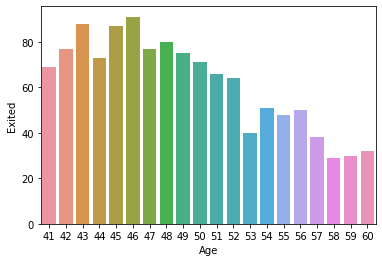

In [132]:
sns.barplot(x= 'Age', y= 'Exited', data= Age_btw_40_60,ci= None ,estimator= np.sum)

Customers between 60 and 80 years old. We have 452 customers with taht age

#### Between 60 and 80 years old 

In [133]:
Age_btw_60_80 = df_churn2.query('Age > 60 & Age <=80')

len(Age_btw_60_80)

452

We have 114 customers who left the bank and 338 who did not

In [134]:
count_60_80 = Age_btw_60_80['Exited'].value_counts()

count_60_80

0    338
1    114
Name: Exited, dtype: int64

25 % of our customers between 60 and 80 years old left the bank

In [135]:
porc_leave_60_80 = (count_60_80[1] / len(Age_btw_60_80))*100

print(round(porc_leave_60_80),'%')

25 %


We can see that the top 10 customers who leave the bank between 60 and 80 years old, are between 60 and 70 years old

In [136]:
Age_btw_60_80.groupby('Age')['Exited'].sum().sort_values(ascending = False).head(10)

Age
61    21
62    21
63    18
64    12
65     8
71     7
66     7
68     6
67     5
70     4
Name: Exited, dtype: int64

We can see we do not have customers from 75 who left the bank and the most customers are from 61 to 64 years old.

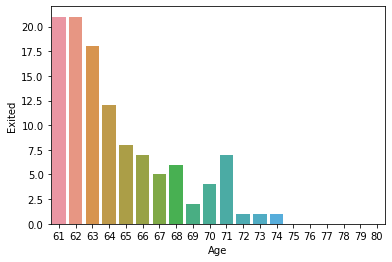

In [137]:
sns.barplot(x= 'Age', y= 'Exited', data= Age_btw_60_80,ci= None ,estimator= np.sum)

#### Above 80 years old 

Customers from 80 years old. We have 12 customers with taht age

In [138]:
Age_high_80 = df_churn2.query('Age > 80')

len(Age_high_80)

12

We have 1 customers who left the bank and 11 who did not

In [139]:
count_high_80 = Age_high_80['Exited'].value_counts()

count_high_80

0    11
1     1
Name: Exited, dtype: int64

8 % of the customers above 80 years old left the bank

In [140]:
porc_leave_high_80= (count_high_80[1] / len(Age_high_80))*100

print(round(porc_leave_high_80),'%')

8 %


We just have 1 customer with 84 years old who left the bank 

In [141]:
Age_high_80.groupby('Age')['Exited'].sum()

Age
81    0
82    0
83    0
84    1
85    0
88    0
92    0
Name: Exited, dtype: int64

We can visualize  the only customer who left the bank

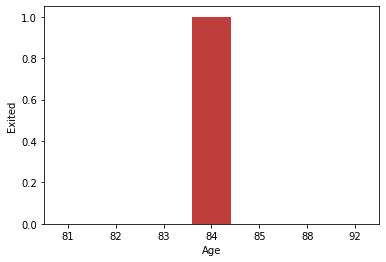

In [142]:
sns.barplot(x= 'Age', y= 'Exited', data= Age_high_80,ci= None ,estimator= np.sum)

#### Most of customers who left the bank from 30 to 50 years old 

##### Between 30 and 40 years old


**In the previous analyzes it was possible to notice that most of the customers who left the bank in relation to age are between 30 and 50 years old, let's make a more specific analysis with these values ​​to answer our hypothesis.**

We have 4778 customers between 30 and 40 years old 

In [143]:
Age_btw_30_40 = df_churn2.query('Age >=30 & Age <=40')

len(Age_btw_30_40)

4778

We have 562 customers who left the bank

In [144]:
count_30_40 = Age_btw_30_40['Exited'].value_counts()

count_30_40

0    4216
1     562
Name: Exited, dtype: int64

12 % of customers left the bank

In [145]:
porc_leave_30_40 = (count_30_40[1] / len(Age_btw_30_40))*100

print(round(porc_leave_30_40),'%')

12 %


##### Between 40 and 50 years old 

We have 2320 customers between 40 and 50 years old 

In [146]:
Age_btw_40_50 = df_churn2.query('Age >40 & Age <=50')

len(Age_btw_40_50)

2320

We have 788 customers who left the bank

In [147]:
count_40_50 = Age_btw_40_50['Exited'].value_counts()

count_40_50

0    1532
1     788
Name: Exited, dtype: int64

34 % of the customers left the bank

In [148]:
porc_leave_40_50 = (count_40_50[1] / len(Age_btw_40_50))*100

print(round(porc_leave_40_50),'%')

34 %


We have 7098 customers between 30 and 50 years old

In [149]:
total_customer_btw_30_50 = len(Age_btw_30_40) + len(Age_btw_40_50)

total_customer_btw_30_50

7098

Our customers between 30 an 50 years old represents 71 % of total of customers

In [150]:
porcent_total_customer = round((total_customer_btw_30_50 ) / len(df_churn2)*100)

print(round(porcent_total_customer),'%')

71 %


We have 1350 customers who left the bank between 30 and 50 years old 

In [151]:
total_saiu_banco_30_50 = ((count_30_40[1] + count_40_50[1]))

total_saiu_banco_30_50

1350

19% of customers aged 30 to 50 leave the bank

In [152]:
porcent_custom_btw_30_50_left = ((count_30_40[1] + count_40_50[1]) / total_customer_btw_30_50)*100

print(round(porcent_custom_btw_30_50_left),'%')

19 %


### 3.1.5  h5 Customers with up to 2 years as a customer usually leave the bank 



 we have 2496 customers on this class

In [153]:
tenure_up_to_2 = df_churn2.query('Tenure <= 2')


len(tenure_up_to_2)

2496


we can see how many customers leave per year of stay

In [154]:
up_2 = tenure_up_to_2.groupby('Tenure')['Exited'].sum()

up_2

Tenure
0     95
1    232
2    201
Name: Exited, dtype: int64

We have 528 customers who left the bank

In [155]:
total_up2_leave = up_2[0] + up_2[1] + up_2[2]

total_up2_leave

528

we can vizualize how many customers leave per year of stay

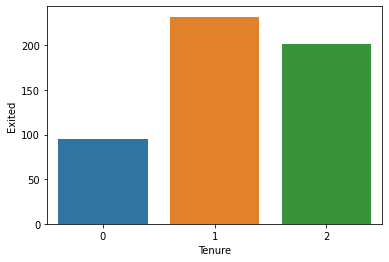

In [156]:
sns.barplot(x= 'Tenure' , y= 'Exited' , data= tenure_up_to_2,ci=None,estimator=np.sum)

21 % of customers left the bank

In [157]:
porc_up_2_leave = (up_2[0]/len(tenure_up_to_2) + up_2[1]/len(tenure_up_to_2) + up_2[2]/len(tenure_up_to_2))*100

porc_up_2_leave

21.153846153846157

### 3.1.6 h6 Customers who do not have a credit card tend to leave the bank

7055 customers have credit card and 2945 customers do not have it.

In [158]:
total_CR =df_churn2['HasCrCard'].value_counts()

total_CR

1    7055
0    2945
Name: HasCrCard, dtype: int64

Number of customers who do not have credit card 2945

In [159]:
has_no_Crcd = df_churn2.query('HasCrCard == 0' )

len(has_no_Crcd)

2945

Number of customers who do not have credit card and left the bank 613 

In [160]:
leave_crcd = df_churn2.groupby('HasCrCard')['Exited'].sum()

leave_crcd[0]

613

21 % of customers who not have a credit card left the bank

In [161]:
porc_leave_crcd = round((leave_crcd[0]/len(has_no_Crcd))*100)

porc_leave_crcd

21

Here we can visualize the difference between who left the bank and who did not.

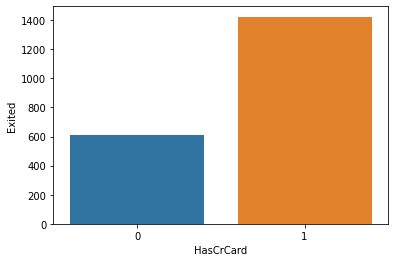

In [162]:
sns.barplot(x='HasCrCard',y= 'Exited',data=df_churn2,estimator= np.sum, ci= None)

## 3.1.7 Conclusions


**Customers with lower scores tend to leave the bank.**

A : 24 % of customers with low score leave the bank

**The country is decisive for the client to leave the bank**

A : France and Germany in terms of number of customers who left the bank are practically the same 810 and 814 respectively and Spain has 413.However , in percentage we have 32% for Germany and 16% for France and Spain. 

**There are more men than women who leave the bank.**

A : Yes , we have 1139 women wich represents 20 % of women who left and we have 898 men wich represents 16 % of men who left.

**Younger customer has a tendency to leave the bank**

A : No, it was possible to see that customers up to 25 years old  do not have a high exit rate from the bank, however customers between 30 and 50 years old  are the vast majority of bank customers and that also have the highest number and exit rate.



**Customers with up to 2 years as a customer usually leave the bank.**

A : 528 or 21 % of customers up to 2 years as a customer left the bank 

**Customers who do not have a credit card tend to leave the bank.**

A: 613 or 21 % of customers who do not have credit card leave the bank


# Feature Engeneering

Criar variável com Kmeans usando k=2. O valor de k é devido a estarmos trabalhando com um problema binário.
Com objetivo de capturar concentrações que podem indicar o churn de clientes ou não foram criadas as variáveis abaixo:- Criar variável EstimatedSalary por location.

- Criar variável Balance por location.

- Criar variável EstimatedSalary por Gender.

- Criar variável EstimatedSalary por HascrCard.

- Criar variável CreditScore por HascrCard.

- Criar variável CreditScore por Gender.

Criar a variável LTV - Life Time Value, através da divisão de Balance por Tenure. Montante de dinheiro que o cliente (disponível para o banco realizar emprestimos) dividido pelo tempo que o cliente está com o Banco.

In [171]:
# Copia do dataset original
dataset = df_churn2.copy()

In [172]:
# Variável kmeans distancia eucliadiana
# Criando copia
churn_temp = dataset.copy()

# Encoder
enc = OrdinalEncoder()
churn_temp['Gender'] = churn_temp['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
churn_temp['Geography'] = enc.fit_transform(np.array(churn_temp['Geography']).reshape(-1,1))

# kmeans model
model = KMeans(n_clusters=2,init='k-means++')
model.fit(churn_temp)
dataset['kmeans_group'] = model.labels_
dataset['kmeans_group'] = dataset['kmeans_group'].astype('category')
dataset['kmeans_group'] = dataset['kmeans_group'].apply(lambda x: 'G1' if x==1 else 'G2')

In [173]:
# Criar variável Balance por location
group_balance = dataset.groupby('Geography').agg({'Balance': ['mean']}).reset_index()
group = pd.concat([group_balance['Geography'],group_balance['Balance']['mean']], axis=1)
group = group.rename(columns={"mean":"balance_mean_country"})
dataset = dataset.merge(group, left_on='Geography', right_on='Geography', how='inner')



In [174]:
# Criar variável EstimatedSalary por location
group_EstimatedSalary = dataset.groupby('Geography').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_EstimatedSalary['Geography'],  group_EstimatedSalary['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"EstimatedSalary_mean_geo"})
dataset = dataset.merge(group, left_on='Geography', right_on='Geography', how='inner')

In [175]:
# Criar variável EstimatedSalary por gender
group_Gender = dataset.groupby('Gender').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_Gender['Gender'],  group_Gender['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"EstimatedSalary_mean_gender"})
dataset = dataset.merge(group, left_on='Gender', right_on='Gender', how='inner')

In [176]:
# Criar variável EstimatedSalary por hascrcard
group_HasCrCard = dataset.groupby('HasCrCard').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_HasCrCard['HasCrCard'],  group_HasCrCard['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"group_HasCrCard_mean"})
dataset = dataset.merge(group, left_on='HasCrCard', right_on='HasCrCard', how='inner')

In [177]:
# Criar variável CreditScore score por Hascrcard
group_hascrcard = dataset.groupby('HasCrCard').agg({'CreditScore': ['mean']}).reset_index()
group = pd.concat([group_hascrcard['HasCrCard'],  group_hascrcard['CreditScore']['mean']], axis=1)
group = group.rename(columns={"mean":"hascrcard_mean_credit"})
dataset = dataset.merge(group, left_on='HasCrCard', right_on='HasCrCard', how='inner')

In [178]:
# Criar variável CreditScore score por Gender
group_gender = dataset.groupby('Gender').agg({'CreditScore': ['mean']}).reset_index()
group = pd.concat([group_gender['Gender'],  group_gender['CreditScore']['mean']], axis=1)
group = group.rename(columns={"mean":"gender_mean_credit"})
dataset = dataset.merge(group, left_on='Gender', right_on='Gender', how='inner')

In [184]:
# Criar variável LTV
balance = dataset['Balance'].astype('int64')
dataset['LTV'] = balance / (dataset['Tenure'] + 0.1)

In [186]:
# Dando uma olhada como ficou o dataset
dataset.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,kmeans_group,balance_mean_country,EstimatedSalary_mean_geo,EstimatedSalary_mean_gender,group_HasCrCard_mean,hascrcard_mean_credit,gender_mean_credit,LTV
0,1,15634602,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1,G2,"62,092.637","99,899.181","100,601.541","99,721.162",650.188,650.831,0.000
1,3,15619304,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1,G2,"62,092.637","99,899.181","100,601.541","99,721.162",650.188,650.831,"19,711.111"
2,13,15632264,476,France,Female,34,10,0.000,2,1,0,"26,260.980",0,G2,"62,092.637","99,899.181","100,601.541","99,721.162",650.188,650.831,0.000
3,20,15568982,726,France,Female,24,6,0.000,2,1,1,"54,724.030",0,G2,"62,092.637","99,899.181","100,601.541","99,721.162",650.188,650.831,0.000
4,25,15625047,846,France,Female,38,5,0.000,1,1,1,"187,616.160",0,G2,"62,092.637","99,899.181","100,601.541","99,721.162",650.188,650.831,0.000


## Heat Map

In [180]:
df_churn_heat = df_churn2[['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']]

In [181]:
df_churn_heat.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Tenure
0,619,42,0.000,1,"101,348.880",2
1,608,41,"83,807.860",1,"112,542.580",1
2,502,42,"159,660.800",3,"113,931.570",8
3,699,39,0.000,2,"93,826.630",1
4,850,43,"125,510.820",1,"79,084.100",2


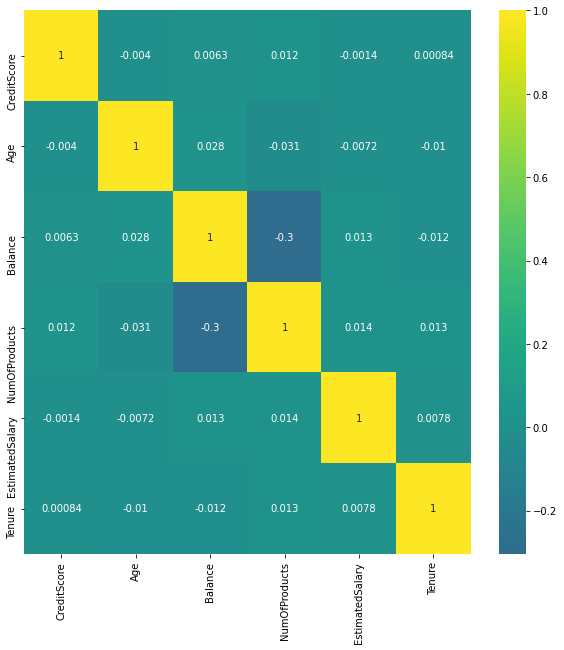

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(df_churn_heat.corr(),annot= True,center= 0,cmap= 'viridis')

In [183]:
df_churn_heat_spearman = df_churn2.drop(['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','CustomerId','RowNumber','Tenure'],axis=1)

In [115]:
df_churn_heat_spearman.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


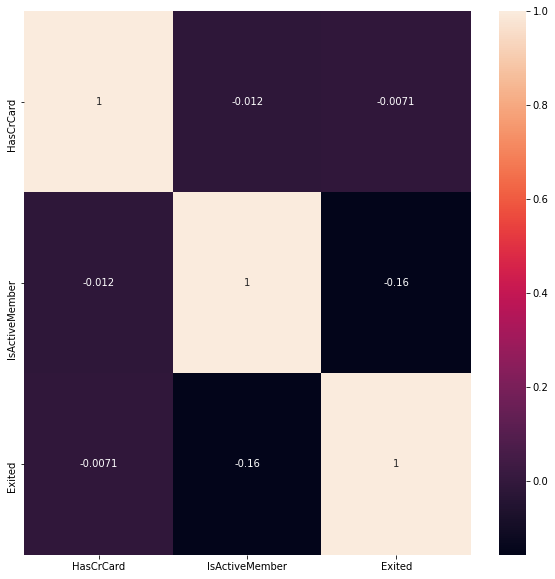

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(df_churn_heat_spearman.corr(method='spearman'),annot= True);

 # 4.0  Metrics

# 5.0 Baseline

In [116]:

X= df_churn2[['Age','HasCrCard']]

y = df_churn2['Exited']


In [117]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,random_state = 42 )

In [118]:
X_test.shape

(2500, 2)

In [119]:
SVC = LinearSVC()

In [120]:
SVC.fit(X_train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

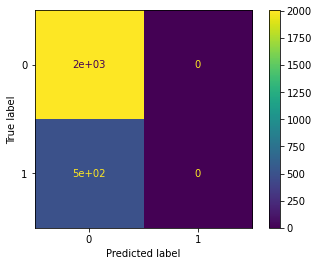

In [121]:
plot_confusion_matrix(SVC, X_test, y_test ) 
plt.show()

In [122]:
pred = SVC.predict(X_test)

In [123]:
confusion_matrix(y_test,pred)

array([[2003,    0],
       [ 497,    0]])

In [124]:
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.00      0.00      0.00       497

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



# 6.0 Feature Engeneering

In [125]:
lab = LabelEncoder()

In [126]:
df_churn2['Gender'] = lab.fit_transform(df_churn2['Gender'] )

df_churn2['Geography'] = lab.fit_transform(df_churn2['Geography'] )

In [127]:
df_churn2.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.000,1,1,1,"101,348.880",1
1,2,15647311,608,2,0,41,1,"83,807.860",1,0,1,"112,542.580",0
2,3,15619304,502,0,0,42,8,"159,660.800",3,1,0,"113,931.570",1
3,4,15701354,699,0,0,39,1,0.000,2,0,0,"93,826.630",0
4,5,15737888,850,2,0,43,2,"125,510.820",1,1,1,"79,084.100",0


# 7.0 Data Preparation

In [220]:
X= dataset.drop(['Exited','RowNumber','CustomerId'],axis= 1)

y = dataset['Exited']

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [222]:
# Alterando os tipos da Geography e Gender
varr = ['Geography', 'Gender']
for var in varr:
    X_train[var] = X_train[var].astype('category')
    X_test[var] = X_test[var].astype('category')

# Alterando o tipo dos ys
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

## Power Transform

In [226]:
# Copy dos dados
X_train_power = X_train.copy() 
X_test_power = X_test.copy()
y_train_power = y_train.copy()
y_test_power = y_test.copy()

## transformando as variáveis categóricas em numéricas 

In [227]:
# Ordinal Encoder
variaveis_category = X_train_power.select_dtypes('category')

# Instanciando o Ordinal Encoder
enc = OrdinalEncoder()

for var in variaveis_category:
    X_train_power[var] = enc.fit_transform(np.array(X_train_power[var]).reshape(-1,1))
    X_test_power[var] = enc.transform(np.array(X_test_power[var]).reshape(-1,1))

In [231]:

# Numerical var
variaveis_numerical = X_train_power.select_dtypes(['int64','float64'])

# Instanciando o Power Transform
power = PowerTransformer()

for var in variaveis_numerical:
    X_train_power[var] = power.fit_transform(np.array(X_train_power[var]).reshape(-1,1))
    X_test_power[var] = power.transform(np.array(X_test_power[var]).reshape(-1,1))

## MinMaxScaler

In [232]:
# Copy dos dados
X_train_minmax = X_train.copy() 
X_test_minmax = X_test.copy()
y_train_minmax = y_train.copy()
y_test_minmax = y_test.copy()

## transformando as variáveis categóricas em numéricas 

In [233]:
# Ordinal Encoder
variaveis_category = X_train_minmax.select_dtypes('category')

# Instanciando o Ordinal Encoder
enc = OrdinalEncoder()

for var in variaveis_category:
    X_train_minmax[var] = enc.fit_transform(np.array(X_train_minmax[var]).reshape(-1,1))
    X_test_minmax[var] = enc.transform(np.array(X_test_minmax[var]).reshape(-1,1))

In [234]:

# Numerical var
variaveis_numerical = X_train_minmax.select_dtypes(['int64','float64'])

# Instanciando o Power Transform
power = MinMaxScaler()

for var in variaveis_numerical:
    X_train_minmax[var] = power.fit_transform(np.array(X_train_minmax[var]).reshape(-1,1))
    X_test_minmax[var] = power.transform(np.array(X_test_minmax[var]).reshape(-1,1))

# Balancing Data 

#10.0 Conclusion